In [1]:
#exp9 EM(GaussianMixture) and KMeans clustering
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import mglearn as mg
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
dataset = pd.read_csv("IRIS.csv")

In [3]:
dataset.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
data = dataset.iloc[:, :-1]
target = dataset.iloc[:, -1]
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [5]:
label = LabelEncoder()
label.fit(target)
target = label.transform(target)#here target becomes as ndarray
target[:5]

array([0, 0, 0, 0, 0])

In [6]:
label.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
scr = StandardScaler()
scr.fit(data)
normalized_data = scr.transform(data)

In [8]:
k=3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans_labels = kmeans.fit_predict(normalized_data)
kmeans_silhouette = silhouette_score(normalized_data, kmeans_labels)
print('silhouette of kmeans : ', kmeans_silhouette)

silhouette of kmeans :  0.4787241921049546


In [9]:
gmm = GaussianMixture(n_components = k,random_state = 42 )
gmm_labels = gmm.fit_predict(normalized_data)
gmm_silhouette = silhouette_score(normalized_data, gmm_labels)
print('silhouette of GaussianMixture : ',gmm_silhouette )

silhouette of GaussianMixture :  0.4091841624317957


Text(0.5, 1.0, 'gaussian mixture')

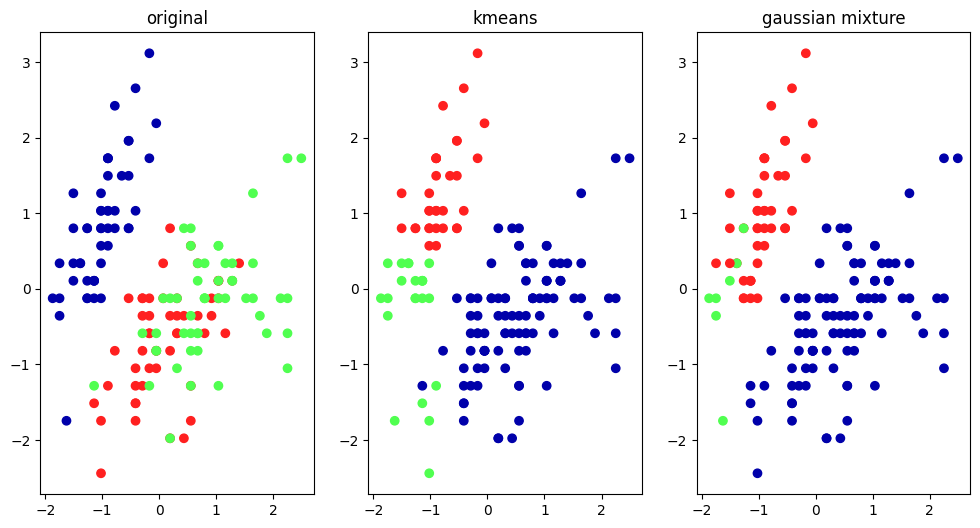

In [10]:
plt.figure(figsize = (12, 6))

plt.subplot(1,3,1)
plt.scatter(normalized_data[:,0], normalized_data[:, 1],
            c = target, cmap = mg.cm3, marker = 'o')
plt.title('original')

plt.subplot(1,3,2)
plt.scatter(normalized_data[:,0], normalized_data[:, 1],
            c = kmeans_labels, cmap = mg.cm3, marker = 'o')
plt.title('kmeans')

plt.subplot(1,3,3)
plt.scatter(normalized_data[:,0], normalized_data[:, 1],
            c = gmm_labels, cmap = mg.cm3, marker = 'o')
plt.title('gaussian mixture')

In [11]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
hk = homogeneity_score(target, kmeans_labels)
ck = completeness_score(target, kmeans_labels)
vk = v_measure_score(target, kmeans_labels)
print('hk', hk)
print('ck', ck)
print('vk', vk)

hk 0.5334123630245353
ck 0.6534912017065124
vk 0.587377604172926


In [12]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
hk = homogeneity_score(target, gmm_labels)
ck = completeness_score(target, gmm_labels)
vk = v_measure_score(target, gmm_labels)
print('hk', hk)
print('ck', ck)
print('vk', vk)

hk 0.5793801642856945
ck 0.8250324316192538
vk 0.6807222139225831
